**Premier League Prediction Model**

This model takes in data from the 2004/05 Premier League Season unttil the 2021/22 season and predicts the outcome of the upcoming season when provided a team name as an input.


*STEPS BEFORE RUNNINNG CELLS*
1. Download the data file from this link https://drive.google.com/file/d/1qE5CYpkHt770HqwQoLe067C9S336yUSY/view?usp=sharing
2. Click on the folder icon on the task bar to the left
3. Drag and drop the data file into the folder
4. Continue running the cells

In [ ]:
%pip install pandas
%pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#All the import statments
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#used to display the actual plots in a jupyter notebook

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
#load data
data = pd.read_csv("BigPositionVsValue.csv")
data.head(10) #display the first 10 rows

#data.describe() #uncomment this to see various statistics

,Year,Team,Position,Goal Difference,Points,Squad Size,Average Age,Number of Foreigners,Average Market Value,Total Market Value
0,2004,chelsea fc,1,57,95,31,24.4,24,10.69,331.48
1,2004,manchester united,3,51,83,37,24.2,25,7.93,293.23
2,2004,arsenal fc,2,32,77,37,23.4,29,6.68,247.00
3,2004,liverpool fc,5,-1,61,38,24.8,26,5.85,222.13
4,2004,tottenham hotspur,9,11,58,37,24.6,21,3.44,127.25
5,2004,newcastle united,14,5,58,32,25.4,15,3.93,125.90
6,2004,birmingham city,12,7,55,37,26.1,21,2.86,105.98
7,2004,manchester city,8,8,52,34,26.1,21,2.77,94.30
8,2004,middlesbrough fc,7,6,52,32,25.7,13,2.78,88.93
9,2004,southampton fc,20,-7,47,41,25.9,25,2.08,85.48


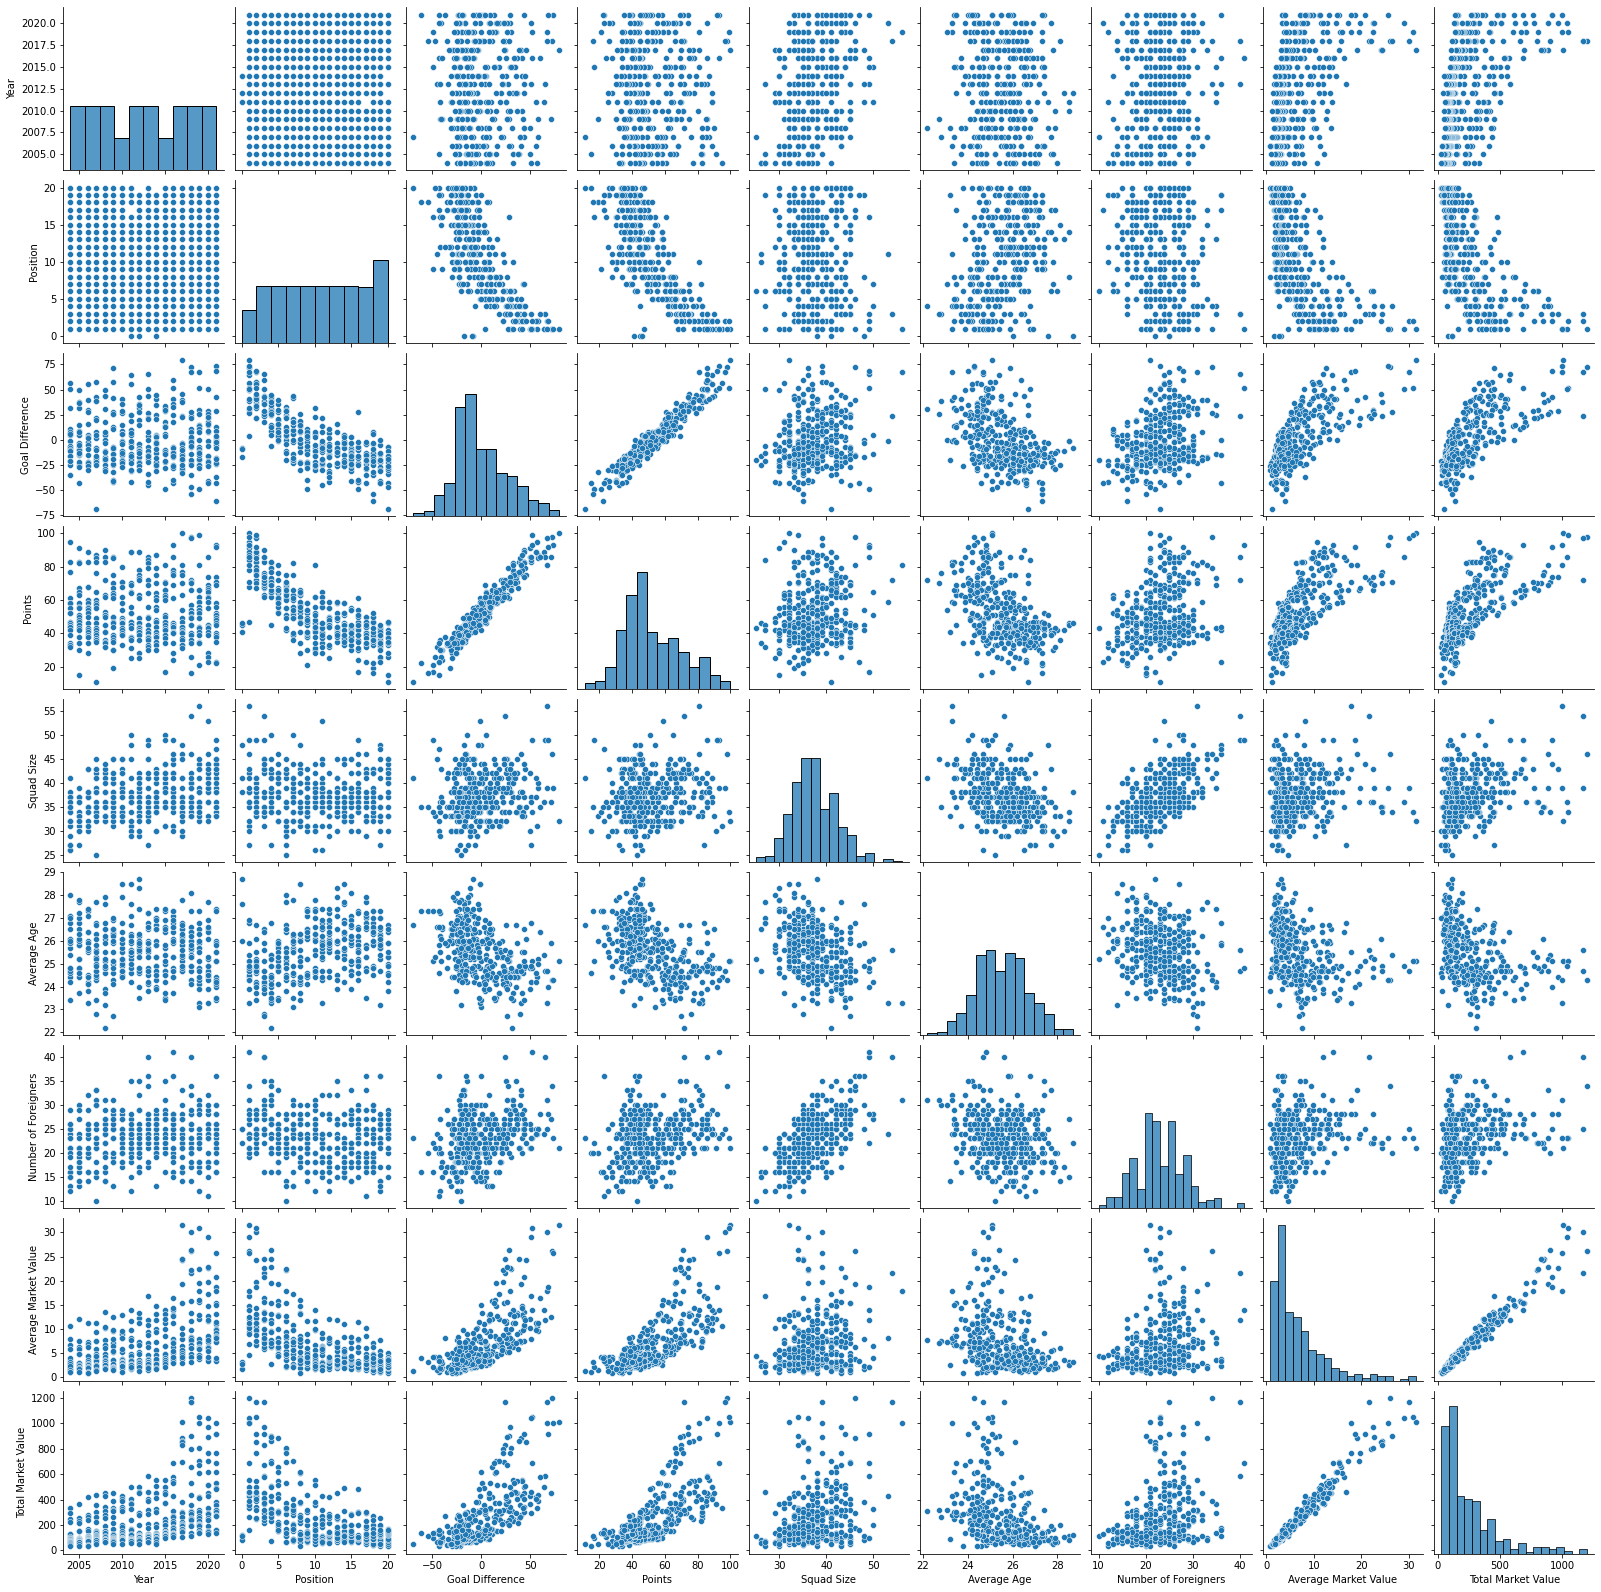

In [ ]:
#Plot various attributes against each other
sns.pairplot(data[["Year", "Position", "Goal Difference", "Points", "Squad Size", "Average Age", "Number of Foreigners", "Average Market Value", "Total Market Value"]])

In [ ]:
#Does Squad Value correlate better with Points or with Position
position_corr = abs(data['Total Market Value'].corr(data['Position']))
points_corr = abs(data['Total Market Value'].corr(data['Points']))
print(position_corr, points_corr)
#Points is the true determinator or success

0.5959731512749078 0.7351205968186638


In [ ]:
#Creating the Model
x = data['Total Market Value']
y = data['Points']

x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 101)

lm = LinearRegression()
lm.fit(x_train, y_train)

print(lm.coef_)
#An extra million euros gets you 0.057 points

[[0.05691279]]


<function matplotlib.pyplot.show(*args, **kw)>

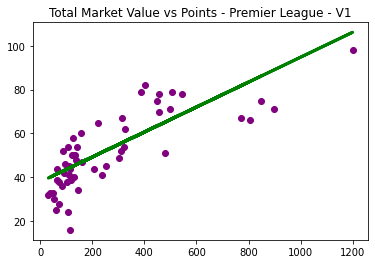

In [ ]:
#Testing the Model
predictions = lm.predict(x_test)

plt.scatter(x_test, y_test, color = 'purple')
plt.plot(x_test, predictions, color = 'green', linewidth = 3)
plt.title("Total Market Value vs Points - Premier League - V1")
plt.show

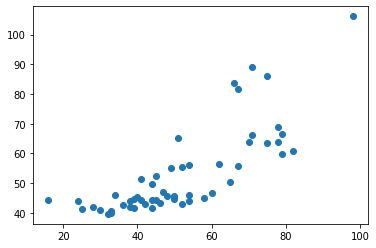

In [ ]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


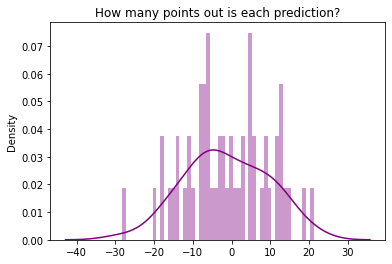

In [ ]:
plt.title('How many points out is each prediction?')
sns.distplot((y_test-predictions),bins=50, color = 'purple')

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))


Mean Absolute Error: 8.966314745810523


# Version 2
One big, glaring issue in this model is inflation. To fix this, we can normalize the values by making the total market value of the team with the greatest total market value 1.0. Every other team would be a fraction of the team with the total. This way, all the values are normalized.

In [ ]:
relativeValue = []

#Loop through each row
for index, team in data.iterrows():

    #Obtain which season we are looking at
    season = team['Year']

    #Create a new dataframe with just this season
    teamseason = data[data['Year'] == season]

    #Find the max value
    maxvalue = teamseason['Total Market Value'].max()

    #Divide this row's value by the max value for the season
    tempRelativeValue = team['Total Market Value']/maxvalue

    #Append it to our list
    relativeValue.append(tempRelativeValue)

#Add list to new column in main dataframe
data["Relative Market Value"] = relativeValue

#view the new table
data.head()

,Year,Team,Position,Goal Difference,Points,Squad Size,Average Age,Number of Foreigners,Average Market Value,Total Market Value,Relative Market Value
0,2004,chelsea fc,1,57,95,31,24.4,24,10.69,331.48,1.000000
1,2004,manchester united,3,51,83,37,24.2,25,7.93,293.23,0.884608
2,2004,arsenal fc,2,32,77,37,23.4,29,6.68,247.00,0.745143
3,2004,liverpool fc,5,-1,61,38,24.8,26,5.85,222.13,0.670116
4,2004,tottenham hotspur,9,11,58,37,24.6,21,3.44,127.25,0.383884


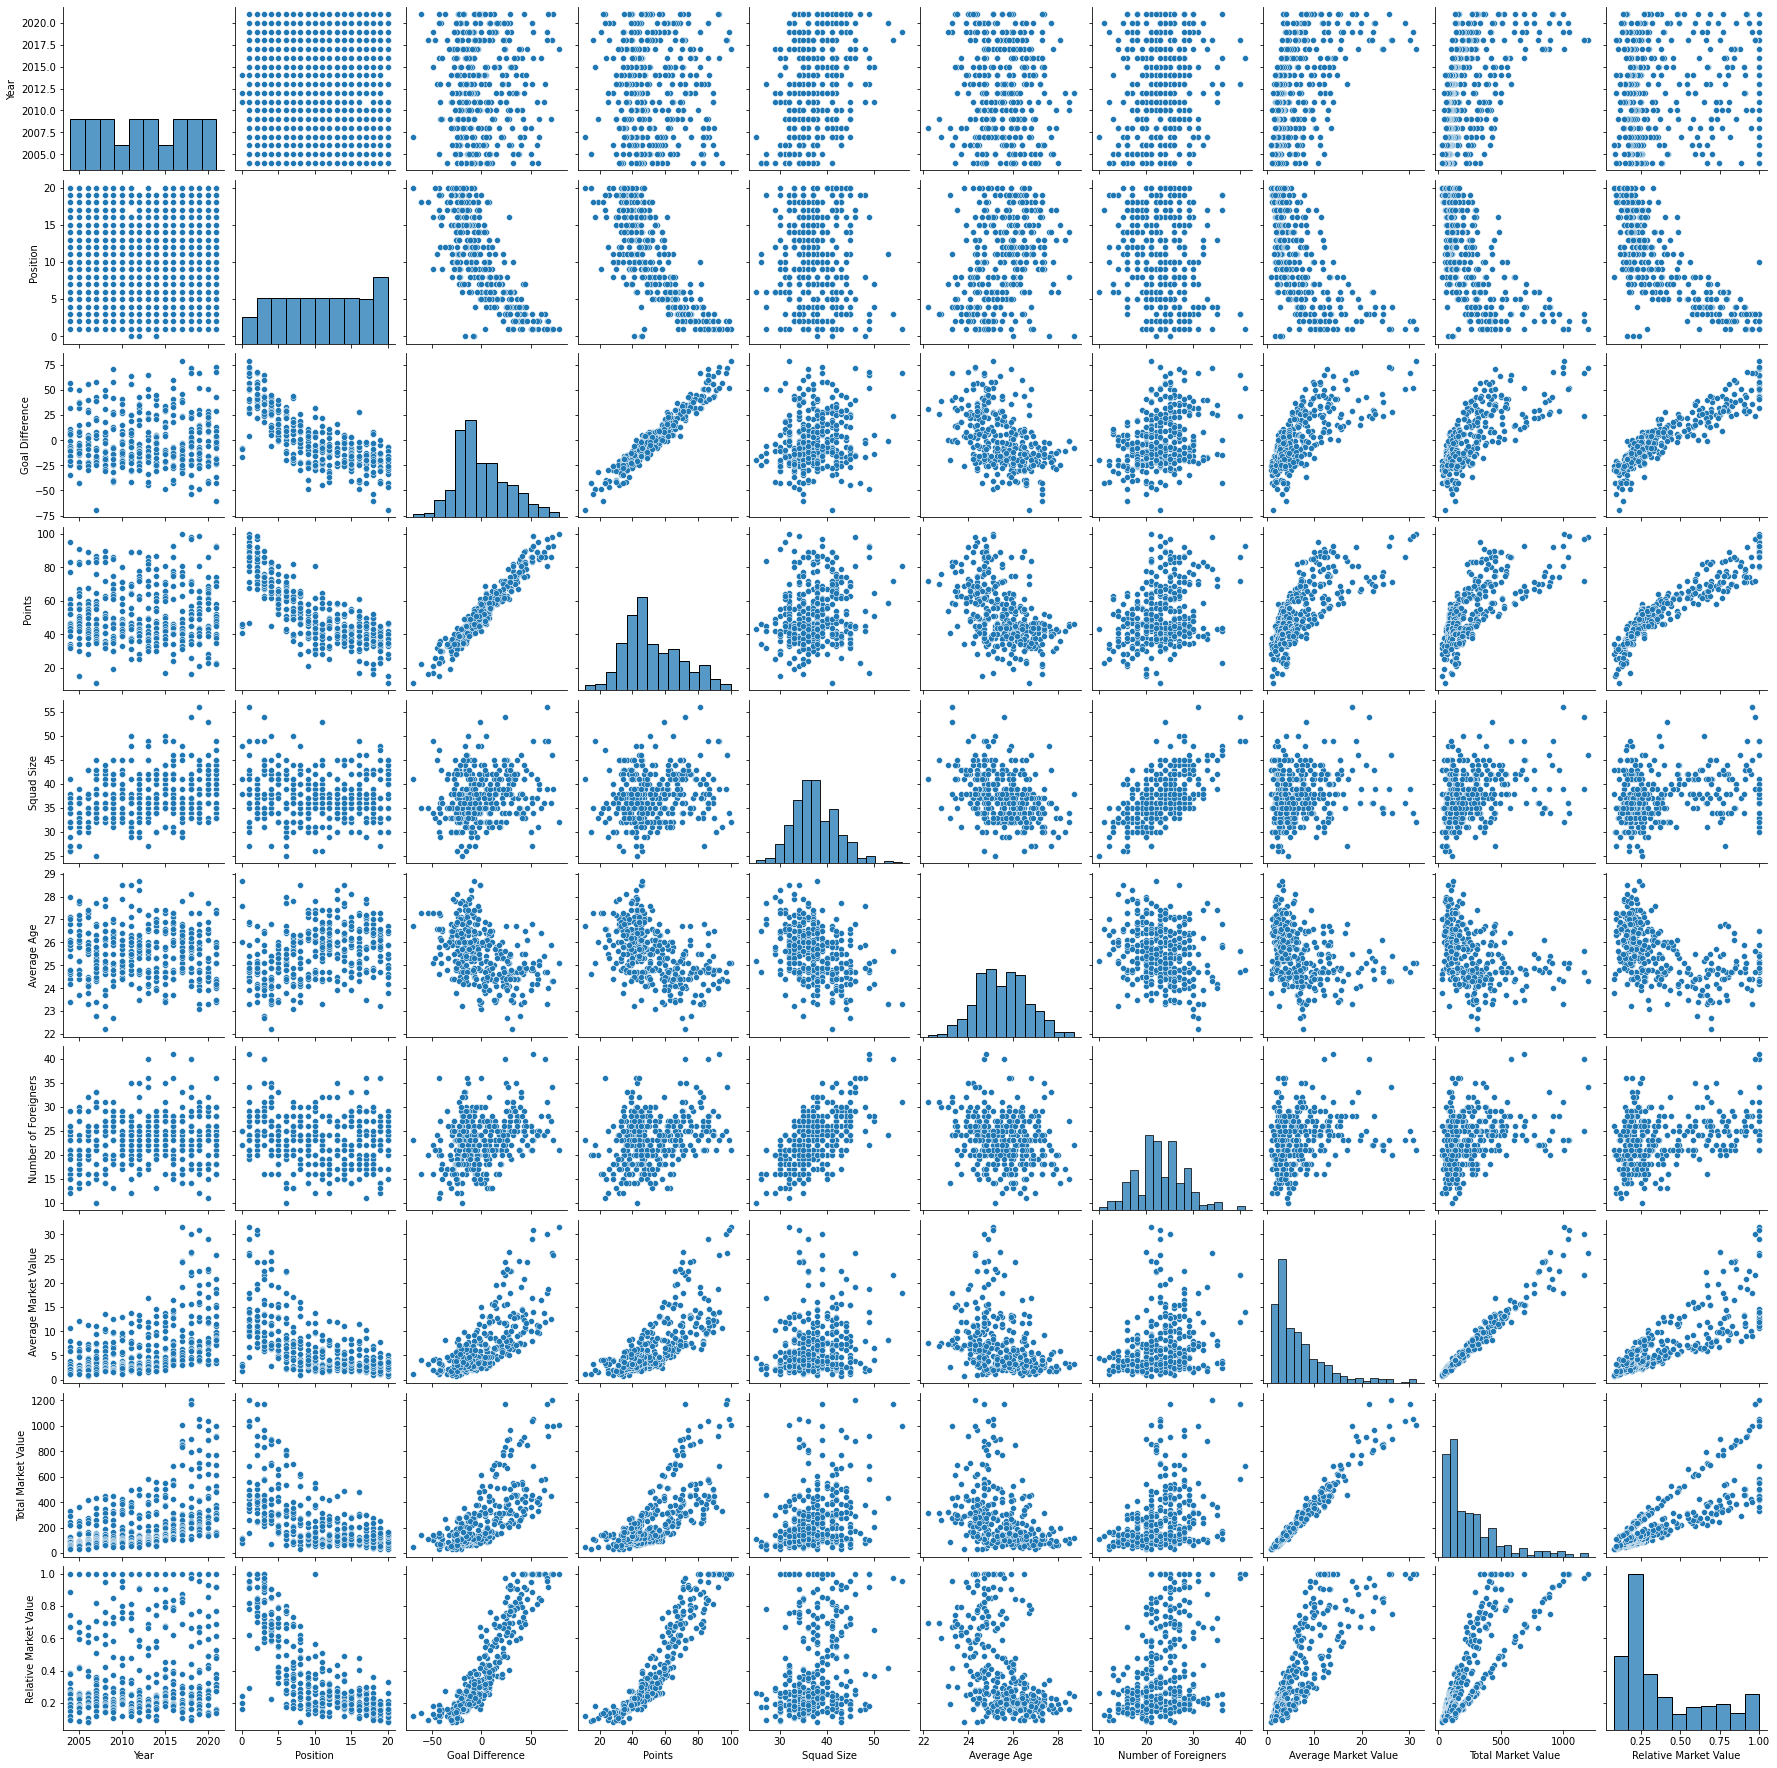

In [ ]:
#Plot various attributes against each other
sns.pairplot(data[["Year", "Position", "Goal Difference", "Points", "Squad Size", "Average Age", "Number of Foreigners", "Average Market Value", "Total Market Value", "Relative Market Value"]])

In [ ]:
abs(data['Relative Market Value'].corr(data['Points']))
#Before this was 0.735

0.9318267497326072

In [ ]:
#Build Model V2
x = data['Relative Market Value']
y = data['Points']
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=101)

lm = LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

In [ ]:
#Test the Model
print(lm.coef_/100) #a 1% increase in a team's relative market value means 0.614 more points


[[0.61415136]]


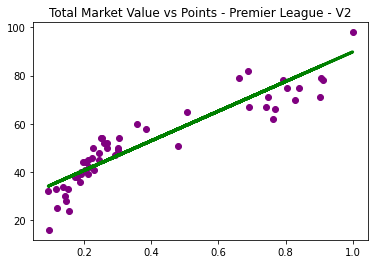

In [ ]:
predictions = lm.predict(x_test)

plt.scatter(x_test, y_test,  color='purple')
plt.plot(x_test, predictions, color='green', linewidth=3)
plt.title("Total Market Value vs Points - Premier League - V2")
plt.show()

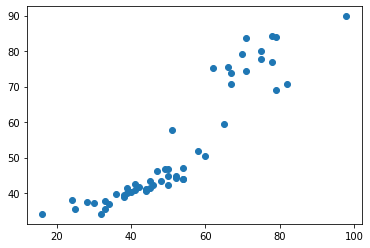

In [ ]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


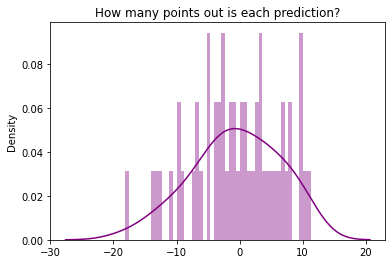

In [ ]:
plt.title('How many points out is each prediction?')
sns.distplot((y_test-predictions),bins=50,color='purple');

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
#Before the MAE was 8.9. This is a huge improvement

MAE: 5.63069910949847


**FINAL TEST!**
Lets see where each team will finish based on their relative market value. I'll be using the 2022-23 season's data.

In [ ]:
#Data
teams = ['Manchester City','Liverpool FC','Chelsea FC','Arsenal FC','Manchester United','Tottenham Hotspur'	,'West Ham United'	,'Aston Villa'	,'Newcastle United','Leicester City','Everton FC','Wolverhampton Wanderers'	,'Brighton & Hove Albion','Southampton FC','Brentford FC','Crystal Palace','Leeds United','Nottingham Forest','Fulham FC','AFC Bournemouth']
market_values = [1110.00,928.00,914.50,759.00,728.10,688.30,460.50,459.60,452.20,428.10,408.30,388.00,335.10,333.50,321.90,291.70,283.80,283.08,240.00,178.70]

#normalize the market values
max_val = 1110.00
for i in range(len(market_values)):
  market_values[i] = market_values[i]/max_val

#Predict where a team will finish
index = teams.index('Crystal Palace') #Enter the team name here
inp = [[market_values[index]]]
number_of_points = lm.predict(inp) #Output will be the number of points they get
print("Number of points: ", number_of_points)

Number of points:  [[44.55583022]]
